# DSAI 305 - Project -  Phase 2
> **Notebook for paper:**  "*Machine Learning as a Tool for Assessment and Management of Fraud Risk in Banking Transactions*"
> https://www.mdpi.com/1911-8074/18/3/130



by :  `Anas Ahmad Abdelsalam - 202202029`
---
------
-----

## Data Initialization

`Imports`

In [ ]:
!pip install autoviz
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 6.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [ ]:
!pip install modin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:0000:010:01


In [2]:
pip install skfeature-chappers

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from google.colab import files
import numpy as np
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
from google.colab import files
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
import shap
from lime.lime_tabular import LimeTabularExplainer
from skfeature.function.similarity_based import fisher_score


`Data`

In [ ]:
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"anasahmad25","key":"c19748e9006a9e92b92e3cce846878ef"}'}

In [ ]:
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d ealaxi/paysim1

Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0


In [ ]:
# !unzip -o paysim1.zip

Archive:  paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


`Loaded`

In [4]:
df = pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

`Fast Eda`

In [ ]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('PS_20174392719_1491204439457_log.csv')

    max_rows_analyzed is smaller than dataset shape 6362620...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    11 Predictors classified...
        2 variable(s) removed since they were ID or low-info

Number of All Scatter Plots = 15
All Plots done
Time to run AutoViz = 29 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="paysim", explorative=True)
profile.to_file("eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [03:19<00:00, 18.14s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

`Features Impotrance`

In [ ]:
df_fs = df.copy()

colsF = [c for c in df_fs.columns if c not in ['isFraud', 'nameOrig', 'nameDest']]
X_fs = df_fs[colsF]
y_fs = df_fs['isFraud']
scores = fisher_score.fisher_score(X_fs.values, y_fs.values)
feat_scores = pd.Series(scores, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_scores.plot.barh()
plt.gca().invert_yaxis()
plt.xlabel('Fisher Score')
plt.tight_layout()
plt.show()

---
---

## Feature Engineering



> In the original paper, certain preprocessing and feature engineering techniques were employed that are not directly applicable to the PaySim dataset due to different nature of features, for example  the paper used country and geographic information about both senders and beneficiaries, which are not present in the paysim dataset.. also, the authors built features based on monthly and weekly time windows to capture periodic transaction trends, which are impractical in our data where the time unit is in hour steps without context. Finally, the paper included users level tracking data liek profiling the accounts, which cannot be replicated accurately in PaySim due to its vague shape for users and cant cluster them according to personal specs.



In [5]:
for col in ['nameOrig', 'nameDest']: # groups the data by sender and reciver to trace operations by person 
    agg = df.groupby(col)['amount'].agg(
        **{
            f'{col}_tx_count': 'count',
            f'{col}_amt_mean': 'mean'
        }
    )
    df = df.join(agg, on=col)

# how do the transaction represent from normal
df['amt_to_orig_mean'] = df['amount'] / df['nameOrig_amt_mean']
df['amt_to_dest_mean'] = df['amount'] / df['nameDest_amt_mean']

# one hot encoding
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# 
feature_cols = [
    'step', 'amount','nameOrig_tx_count', 'nameOrig_amt_mean',
    'nameDest_tx_count', 'nameDest_amt_mean','amt_to_orig_mean', 'amt_to_dest_mean'] + [c for c in df.columns if c.startswith('type_')]

X = df[feature_cols]
y = df['isFraud']

----
----

## Modelling

`Model`

In [6]:
#  MODEL

# TUNER
def tune(model, X, y, param_dist, cv=3, n_iter=20):
    """
    Paper mentioned 3 fold cross validation using a random search approach
    """
    rs = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='roc_auc',
        cv=cv,
        random_state=42,
        n_jobs=-1
    )
    rs.fit(X, y)
    return rs.best_estimator_, rs.best_params_

# TRAIN
def xgbTrain(X, y):
    """
    split to 75% train and 25% test with no resampling as paper mentioned, and tunining with 3 fold cross validation using a random search approach
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, stratify=y, random_state=42
    )
    param_dist = { # random values for cross validation 
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [1, 10, 100]
    }
    mod = XGBClassifier(predictor='gpu_predictor',gpu_id=0,use_label_encoder=False,eval_metric='logloss',tree_method='gpu_hist',random_state=42)
    best_model, best_params = tune(mod, X_train, y_train, param_dist)
    return best_model, best_params, X_train, X_test, y_train, y_test

`Evaluation`

In [7]:
def evaluate_model(model, X_test, y_test):
    """calculate stats"""
    y_probs = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_probs)
    somers_d = 2 * auc - 1
    prec, recall, thresholds = precision_recall_curve(y_test, y_probs)
    f1_scores = 2 * (prec * recall) / (prec + recall)
    best_idx = np.nanargmax(f1_scores)
    best_threshold = thresholds[best_idx]
    y_pred = (y_probs >= best_threshold).astype(int)
    tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    return {
        'Model': 'XGBoost','AUC': auc,'Somers_D': somers_d,
        'Threshold': best_threshold,'False_Positives': fp,
        'False_Negatives': fn }

In [8]:
results_df = pd.DataFrame(columns=['Model','AUC','Somers_D','Threshold','False_Positives','False_Negatives'])

In [9]:
best_model, best_params, X_train, X_test, y_train, y_test = xgbTrain(X, y)
metrics = evaluate_model(best_model, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [21:03:23] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [21:03:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [21:03:23] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [21:03:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist

In [10]:
results_df.loc[len(results_df)] = metrics
results_df.iloc[0]

Model               XGBoost
AUC                0.980784
Somers_D           0.961569
Threshold          0.216453
False_Positives         843
False_Negatives        1001
Name: 0, dtype: object

In [11]:
y_probs = best_model.predict_proba(X_test)[:,1]
threshold = metrics['Threshold']
y_pred = (y_probs >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred).round(4))

Accuracy: 0.9988


`Classification Report`

In [12]:
rep = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(rep).transpose()
report_df.style.background_gradient(cmap='Blues').format('{:.2f}') # to df to plot

`ROC`

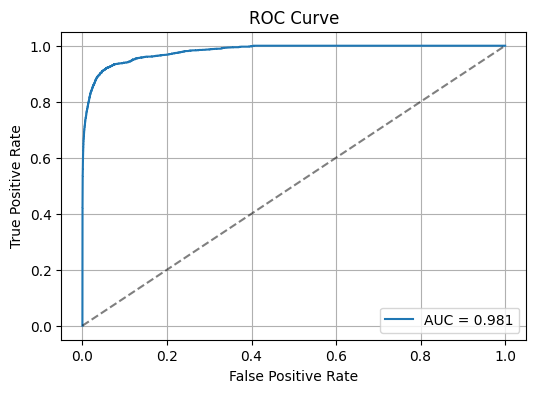

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

`Precision and Recall`

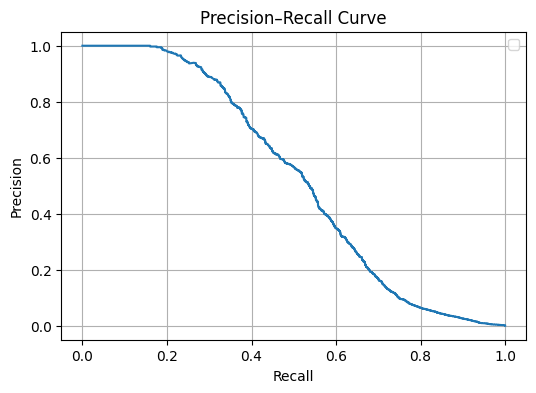

In [14]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


`Lableing Threshold`

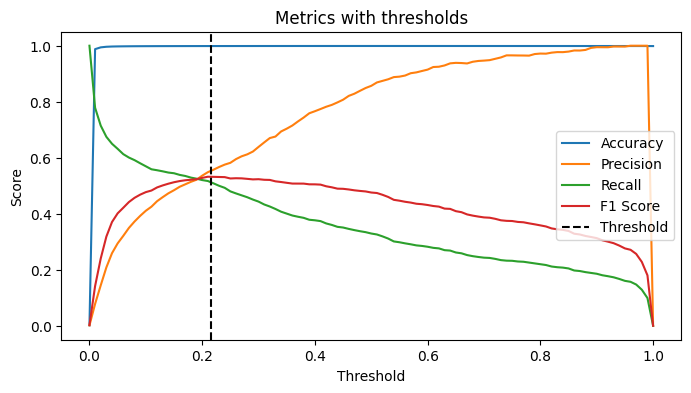

In [32]:
ths = np.linspace(0,1,101) # brute forcing thresholds
accs, precs, recs, f1s = [], [], [], []


for t in ths:
    yp = (y_probs >= t).astype(int)
    accs.append(accuracy_score(y_test, yp))
    precs.append(precision_score(y_test, yp, zero_division=0))
    recs.append(recall_score(y_test, yp))
    f1s.append(f1_score(y_test, yp, zero_division=0))

plt.figure(figsize=(8,4))
plt.plot(ths, accs, label='Accuracy')
plt.plot(ths, precs, label='Precision')
plt.plot(ths, recs, label='Recall')
plt.plot(ths, f1s, label='F1 Score')
plt.axvline(threshold, color='k', ls='--', label='Threshold') # best assumed threshold for labeling
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics with thresholds')
plt.legend()
plt.show()

`Learning Curve`

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [21:17:17] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [21:17:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [21:17:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [21:17:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training,

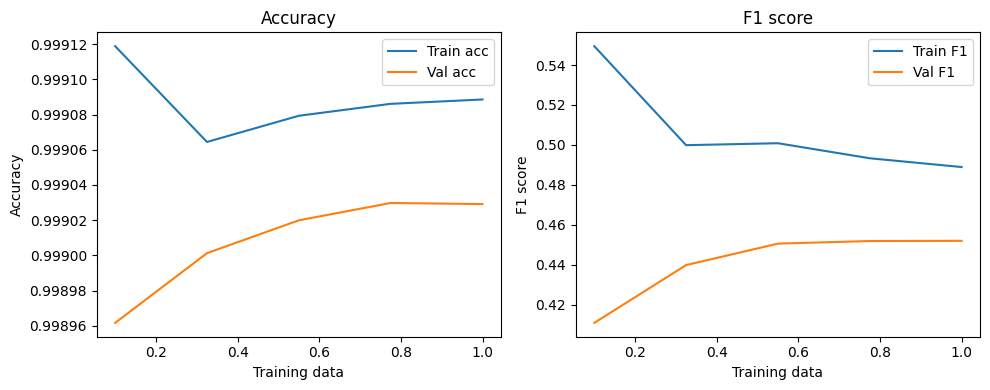

In [17]:
fracs = np.linspace(0.1, 1.0, 5)
_, train_acc, val_acc = learning_curve(best_model, X_train, y_train, cv=3, scoring='accuracy',train_sizes=fracs, n_jobs=-1)
_, train_f1,  val_f1  = learning_curve(best_model, X_train, y_train, cv=3, scoring='f1',train_sizes=fracs, n_jobs=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True)

ax1.plot(fracs, train_acc.mean(axis=1), label='Train acc')
ax1.plot(fracs, val_acc.mean(axis=1),   label='Val acc')
ax1.set_xlabel('Training data')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy')
ax1.legend()
ax2.plot(fracs, train_f1.mean(axis=1),label='Train F1')
ax2.plot(fracs, val_f1.mean(axis=1), label='Val F1')
ax2.set_xlabel('Training data')
ax2.set_ylabel('F1 score')
ax2.set_title('F1 score')
ax2.legend()


plt.tight_layout()
plt.show()

`Validation Curve`

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [20:11:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [20:11:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [20:11:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [20:11:56] WARNING: /workspace/src/learner.cc:742:

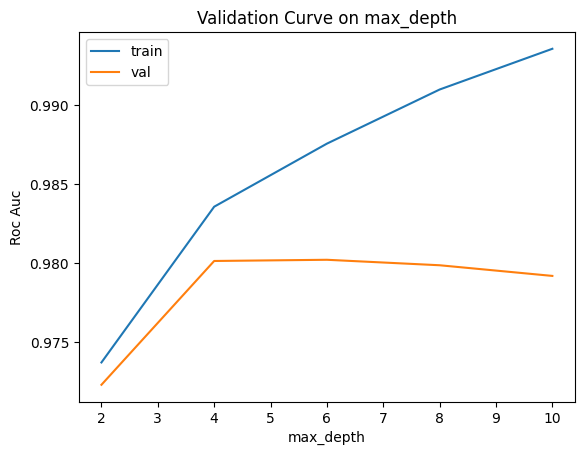

In [30]:
param_range = [2,4,6,8,10]
train_scores, val_scores = validation_curve(
    best_model, X_train, y_train,
    param_name='max_depth',
    param_range=param_range,
    cv=3, scoring='roc_auc', n_jobs=-1
)
plt.plot(param_range, train_scores.mean(1), label='train')
plt.plot(param_range, val_scores.mean(1),   label='val')
plt.xlabel('max_depth')
plt.ylabel('Roc Auc')
plt.title('Validation Curve on max_depth')
plt.legend()
plt.show()


---
---

## XAI

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [20:48:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [20:48:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [20:48:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

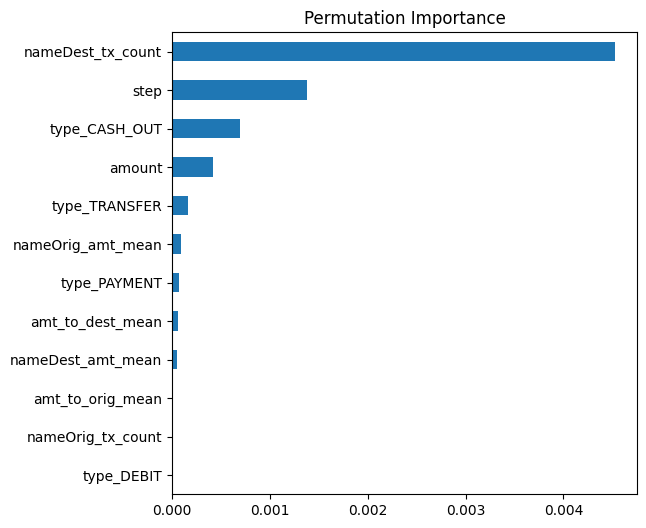

In [46]:


r = permutation_importance(best_model, X_test, y_test,
                           n_repeats=10, random_state=42, n_jobs=-1)
pi = pd.Series(r.importances_mean, index=X_test.columns)
pi.sort_values(ascending=False).head(20).plot.barh(figsize=(6,6))
plt.gca().invert_yaxis()
plt.title("Permutation Importance")
plt.show()


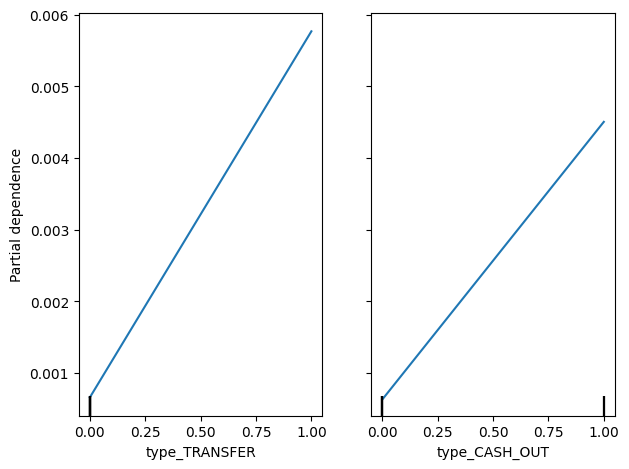

In [50]:
# pick a couple of your top features
fi = pd.Series(best_model.feature_importances_,index=X_train.columns)
top2 = fi.nlargest(2).index.tolist()
features = fi.sort_values(ascending=False).index[:2].tolist()

PartialDependenceDisplay.from_estimator(best_model, X_test, features,kind='average')
plt.tight_layout()
plt.show()


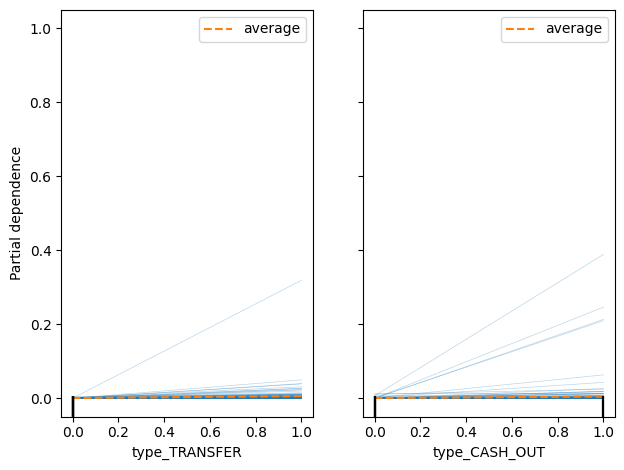

In [51]:
PartialDependenceDisplay.from_estimator(
    best_model, X_test, features,
    kind='both',  # pdp and ice
    subsample=200)
plt.tight_layout()
plt.show()

`SHAPE`

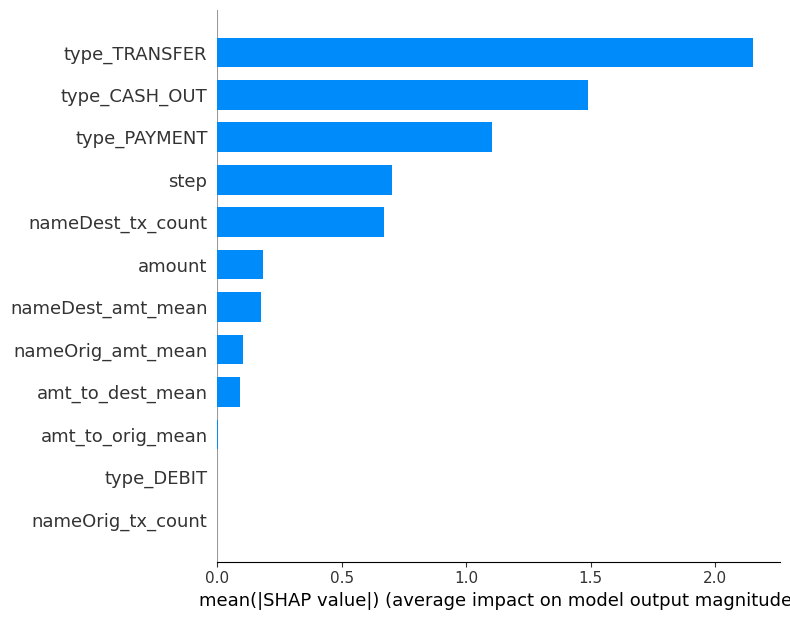

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in less


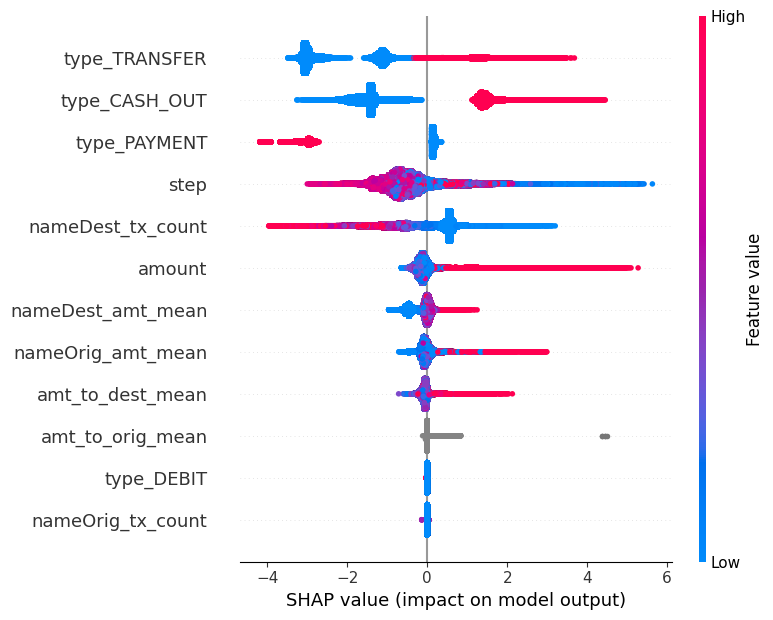

In [35]:

'''used Treeexplainer which is designed to tree based models'''
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
# features global importance
shap.summary_plot(shap_values,X_test, plot_type="bar", eature_names=X_test.columns)

# beeswarm
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

#  first test instance
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[0,:],X_test.iloc[0,:],feature_names=X_test.columns)


`LIME`

In [20]:
# 3 random instances with 30 sample as it crashes with larger scopes

from lime.lime_tabular import LimeTabularExplainer

lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['non-fraud', 'fraud'],
    mode='classification',
    discretize_continuous=False
)

np.random.seed(42)
quick_idxs = np.random.choice(X_test.shape[0], size=3, replace=False)

for idx in quick_idxs:
    exp = lime_explainer.explain_instance(
        X_test.values[idx],
        best_model.predict_proba,
        num_features=3,
        num_samples=30
    )
    # to df 
    # df_exp = pd.DataFrame(exp.as_list(label=1), columns=['feature', 'weight'])
    print(f"\n--- LIME Explanation for instance {idx} ---")
    exp.show_in_notebook(show_table=True, show_all=False)
    # display(df_exp)



--- LIME Explanation for instance 836029 ---



--- LIME Explanation for instance 21338 ---



--- LIME Explanation for instance 1299585 ---


----
----